# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size=0.3)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17756,-121.81,37.35,29.0,2396.0,452.0,2000.0,481.0,4.3750,185500.0,1,0,0,0,0
17347,-120.33,34.87,24.0,2590.0,404.0,1093.0,338.0,3.9375,341200.0,1,0,0,0,0
9038,-118.09,34.74,34.0,1218.0,285.0,797.0,248.0,2.4348,104800.0,0,1,0,0,0
5298,-118.44,34.06,14.0,520.0,292.0,282.0,213.0,2.2857,500001.0,1,0,0,0,0
9451,-119.64,37.61,30.0,2857.0,661.0,291.0,135.0,2.6838,164600.0,0,1,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
test['total_rooms'] /= test['households']
test['total_bedrooms'] /= test['households']
test.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [9]:
validation['total_rooms'] /= validation['households']
validation['total_bedrooms'] /= validation['households']
validation.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [10]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17756,-121.81,37.35,29.0,4.981289,0.939709,2000.0,481.0,4.3750,185500.0,1,0,0,0,0
17347,-120.33,34.87,24.0,7.662722,1.195266,1093.0,338.0,3.9375,341200.0,1,0,0,0,0
9038,-118.09,34.74,34.0,4.911290,1.149194,797.0,248.0,2.4348,104800.0,0,1,0,0,0
5298,-118.44,34.06,14.0,2.441315,1.370892,282.0,213.0,2.2857,500001.0,1,0,0,0,0
9451,-119.64,37.61,30.0,21.162963,4.896296,291.0,135.0,2.6838,164600.0,0,1,0,0,0


In [11]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10381,-117.63,33.63,6.0,5.723881,1.024254,985.0,536.0,4.2009,238000.0,1,0,0,0,0
1651,-121.95,37.94,21.0,7.315545,0.953596,1318.0,431.0,6.8642,285400.0,0,1,0,0,0
18680,-121.91,36.85,22.0,8.420690,2.151724,1301.0,290.0,3.1563,300000.0,0,0,0,0,1
3109,-117.68,35.60,12.0,5.971530,0.857651,765.0,281.0,6.0532,102800.0,0,1,0,0,0
20211,-119.23,34.28,24.0,7.018122,1.138386,1581.0,607.0,5.5048,303600.0,0,0,0,0,1


In [12]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7753,-118.11,33.91,19.0,4.129730,1.025676,1561.0,740.0,3.1369,196900.0,1,0,0,0,0
15283,-117.33,33.17,11.0,5.878902,1.098493,4773.0,1858.0,4.0791,281300.0,0,0,0,0,1
8690,-118.33,33.87,35.0,5.423358,0.934307,385.0,137.0,6.4891,278100.0,1,0,0,0,0
1994,-119.77,36.73,44.0,5.144357,1.031496,1286.0,381.0,2.1518,53000.0,0,1,0,0,0
2651,-124.10,40.47,52.0,4.513208,0.890566,965.0,265.0,3.5345,55000.0,1,0,0,0,0


4) Определение кол-ва отсутствующих значений и их удаление

In [13]:
print('train: ',train['average_bedrooms'].isnull().sum())

train:  81


In [14]:
train_no_null = train.dropna(axis=0)
print(train_no_null.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
average_rooms                 0
average_bedrooms              0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [15]:
X_train, y_train = train_no_null[['average_rooms']], train_no_null['average_bedrooms']
# print(type(train_no_null['average_rooms']))
# print(type(train_no_null[['average_rooms']]))

In [16]:
clf = LinearRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print('RMSE: {}'.format(np.sqrt(MSE(y_train, predictions))))

RMSE: 0.22955188968498855


In [17]:
train_nan_bedrooms = train['average_bedrooms'].isnull()
train_nan_rooms = train.loc[train_nan_bedrooms, ['average_rooms']]
train.loc[train_nan_bedrooms, 'average_bedrooms'] = clf.predict((train_nan_rooms))
print(train['average_bedrooms'].isnull().sum())

0


In [18]:
test_nan_bedrooms = test['average_bedrooms'].isnull()
test_nan_rooms = test.loc[test_nan_bedrooms, ['average_rooms']]
test.loc[test_nan_bedrooms, 'average_bedrooms'] = clf.predict((test_nan_rooms))
print(test['average_bedrooms'].isnull().sum())

0


In [19]:
validation_nan_bedrooms = validation['average_bedrooms'].isnull()
validation_nan_rooms = validation.loc[validation_nan_bedrooms, ['average_rooms']]
validation.loc[validation_nan_bedrooms, 'average_bedrooms'] = clf.predict((validation_nan_rooms))
print(validation['average_bedrooms'].isnull().sum())

0


5) Нормализация признаков longitude и latitude

In [20]:
train['longitude'] -= np.mean(train['longitude'])
train['longitude'] /= np.std(train['longitude'])
train['latitude'] -= np.mean(train['latitude'])
train['latitude'] /= np.std(train['latitude'])

In [21]:
test['longitude'] -= np.mean(train['longitude'])
test['longitude'] /= np.std(train['longitude'])
test['latitude'] -= np.mean(train['latitude'])
test['latitude'] /= np.std(train['latitude'])

In [22]:
validation['longitude'] -= np.mean(train['longitude'])
validation['longitude'] /= np.std(train['longitude'])
validation['latitude'] -= np.mean(train['latitude'])
validation['latitude'] /= np.std(train['latitude'])

In [23]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17756,-1.109481,0.801642,29.0,4.981289,0.939709,2000.0,481.0,4.3750,185500.0,1,0,0,0,0
17347,-0.374872,-0.357776,24.0,7.662722,1.195266,1093.0,338.0,3.9375,341200.0,1,0,0,0,0
9038,0.736970,-0.418551,34.0,4.911290,1.149194,797.0,248.0,2.4348,104800.0,0,1,0,0,0
5298,0.563245,-0.736456,14.0,2.441315,1.370892,282.0,213.0,2.2857,500001.0,1,0,0,0,0
9451,-0.032385,0.923194,30.0,21.162963,4.896296,291.0,135.0,2.6838,164600.0,0,1,0,0,0


In [24]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10381,-117.63,33.63,6.0,5.723881,1.024254,985.0,536.0,4.2009,238000.0,1,0,0,0,0
1651,-121.95,37.94,21.0,7.315545,0.953596,1318.0,431.0,6.8642,285400.0,0,1,0,0,0
18680,-121.91,36.85,22.0,8.420690,2.151724,1301.0,290.0,3.1563,300000.0,0,0,0,0,1
3109,-117.68,35.60,12.0,5.971530,0.857651,765.0,281.0,6.0532,102800.0,0,1,0,0,0
20211,-119.23,34.28,24.0,7.018122,1.138386,1581.0,607.0,5.5048,303600.0,0,0,0,0,1


In [25]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7753,-118.11,33.91,19.0,4.129730,1.025676,1561.0,740.0,3.1369,196900.0,1,0,0,0,0
15283,-117.33,33.17,11.0,5.878902,1.098493,4773.0,1858.0,4.0791,281300.0,0,0,0,0,1
8690,-118.33,33.87,35.0,5.423358,0.934307,385.0,137.0,6.4891,278100.0,1,0,0,0,0
1994,-119.77,36.73,44.0,5.144357,1.031496,1286.0,381.0,2.1518,53000.0,0,1,0,0,0
2651,-124.10,40.47,52.0,4.513208,0.890566,965.0,265.0,3.5345,55000.0,1,0,0,0,0


In [26]:
print('longitude mean: {}'.format(train['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(train['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(train['latitude'].to_numpy().std(axis = 0)))

longitude mean: -6.527078619191618e-14
longitude std: 0.9999999999999994
latitude mean: -3.4929116323799385e-14
latitude std: 1.000000000000004


In [27]:
print('longitude mean: {}'.format(test['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(test['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(test['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(test['latitude'].to_numpy().std(axis = 0)))

longitude mean: -119.57282299741554
longitude std: 1.9990559728590753
latitude mean: 35.62936208010334
latitude std: 2.129352928040299


In [28]:
print('longitude mean: {}'.format(validation['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(validation['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(validation['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(validation['latitude'].to_numpy().std(axis = 0)))

longitude mean: -119.5619808970095
longitude std: 1.9960129886068116
latitude mean: 35.63058139534882
latitude std: 2.138391455618255


# 2 часть

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [30]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [32]:
train, test = train_test_split(df, test_size=0.5)

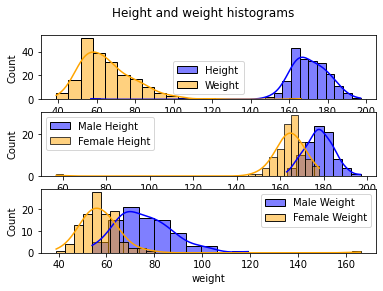

In [33]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [34]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

C:\Users\fenryux\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [35]:
train.head()

,sex,weight,height,repwt,repht
21,1,61,170,61.0,170.0
44,0,85,179,82.0,175.0
91,1,56,161,56.0,161.0
196,0,83,180,80.0,180.0
125,1,52,169,56.0,NaN


In [36]:
test.head()

,sex,weight,height,repwt,repht
43,0,78,183,80.0,180.0
66,1,64,165,63.0,163.0
80,1,61,165,60.0,163.0
199,0,79,177,81.0,178.0
83,1,60,167,55.0,163.0


In [37]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.91


In [38]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.9


C:\Users\fenryux\AppData\Local\Temp/ipykernel_13080/3351774255.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_13080/3351774255.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


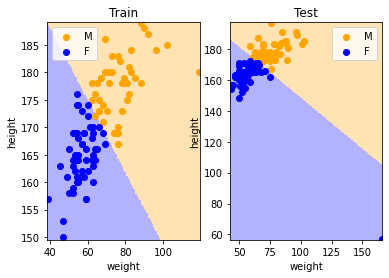

In [39]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Train')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Test')
ax[1].legend()

# 2.2

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [42]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [43]:
validation, test = train_test_split(df, test_size=0.5)

In [44]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [45]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [46]:
clf = LinearRegression().fit(X_validation, y_validation)
print('Score: ', clf.score(X_validation, y_validation))

Score:  0.9297289654895122


In [47]:
predictions = clf.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

R2 =  0.9244177205197761
MSE =  20.545792596220846


Text(0, 0.5, 'Оценка')

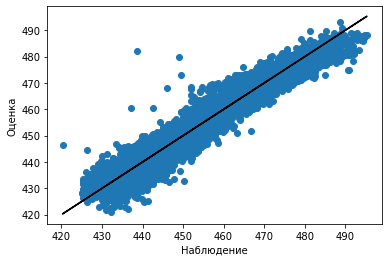

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')